In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.style.use('/Users/nik/Dropbox/Notebooks/thesisrc.py')
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd
import lvdatatools as lvdt

In [2]:
root = '/Volumes/JUPITER/Data/'
os.chdir(root)
data_dir = os.path.join(root,'scfmh5/')
figure_dir = os.path.join(root,'scfmh5/figures/')

In [3]:
filelist = glob.glob(data_dir+'*.bin')
filelist.sort(key=lambda f: f[len(data_dir):-4].lower())
for f in filelist:
    print '\'{0}\''.format(f[len(data_dir):]), '{:0.1f}MB'.format(os.path.getsize(f)/1e6)

'cooldown_14-12-6_0T_a.bin' 0.2MB
'cooldown_noCNT_a.bin' 0.0MB
'gateswp_14-12-6_0T_4K_e.bin' 0.0MB
'gateswp_14-12-6_300K-0T_a.bin' 48.3MB
'gateswp_14-12-6_4K-0T_a.bin' 32.9MB
'gateswp_14-12-6_4K-0T_b.bin' 192.7MB
'gateswp_14-12-6_4K-0T_c.bin' 0.4MB
'gateswp_14-12-6_4K-0T_d.bin' 0.0MB
'gateswp_19-15-6_300K-0T_a.bin' 1.9MB
'gateswp_7-2-6_0T_4K_a.bin' 0.0MB
'gateswp_7-2-6_0T_4K_b.bin' 0.2MB
'gateswp_7-2-6_0T_4K_c.bin' 0.2MB
'vigate_14-12-6_4K_0T_a.bin' 0.7MB
'vigate_7-2-6_0T_4K_a.bin' 0.0MB


# Device Images

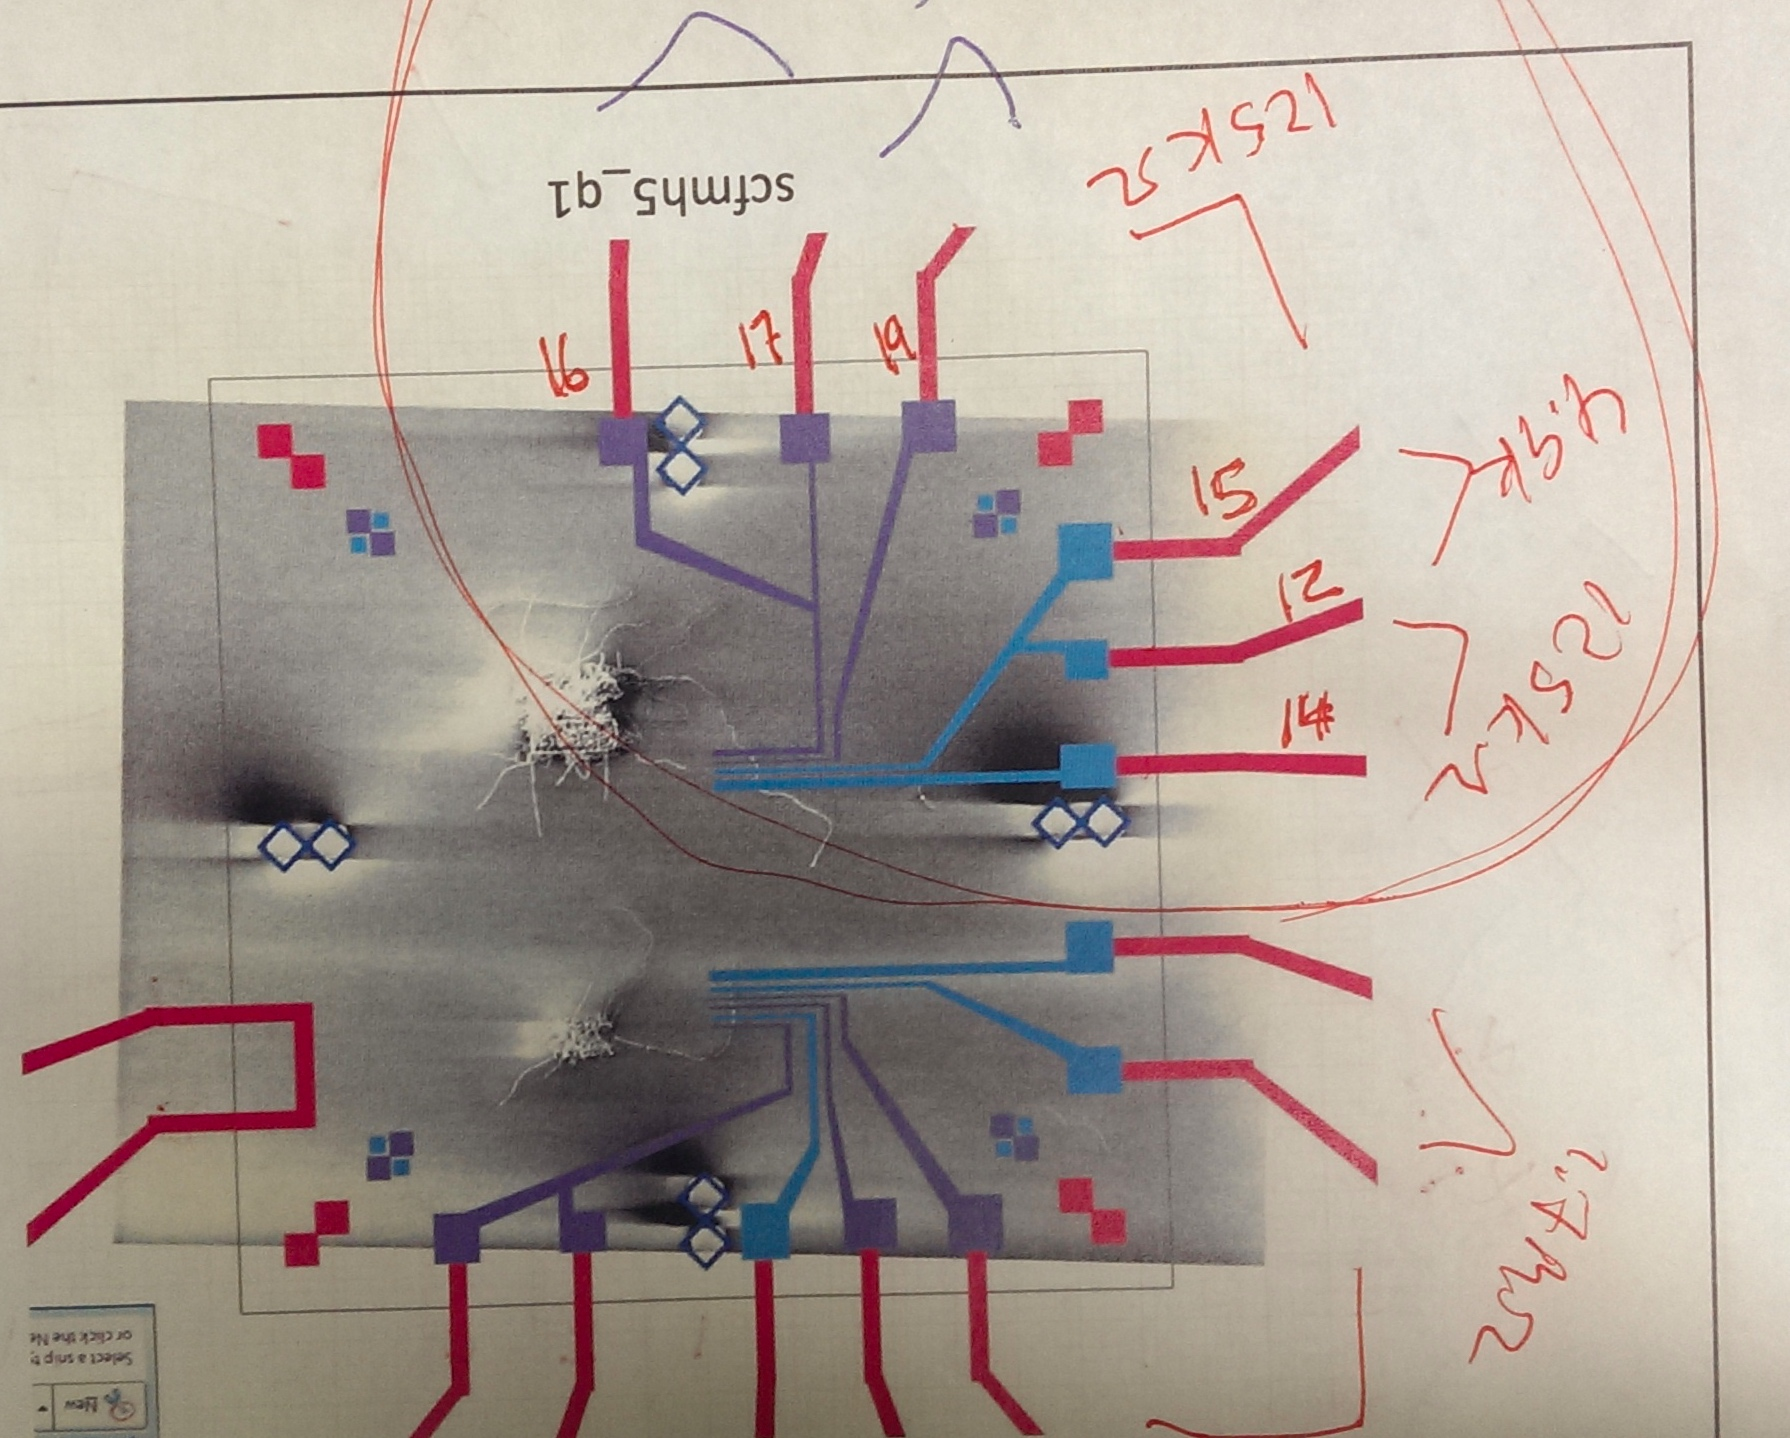

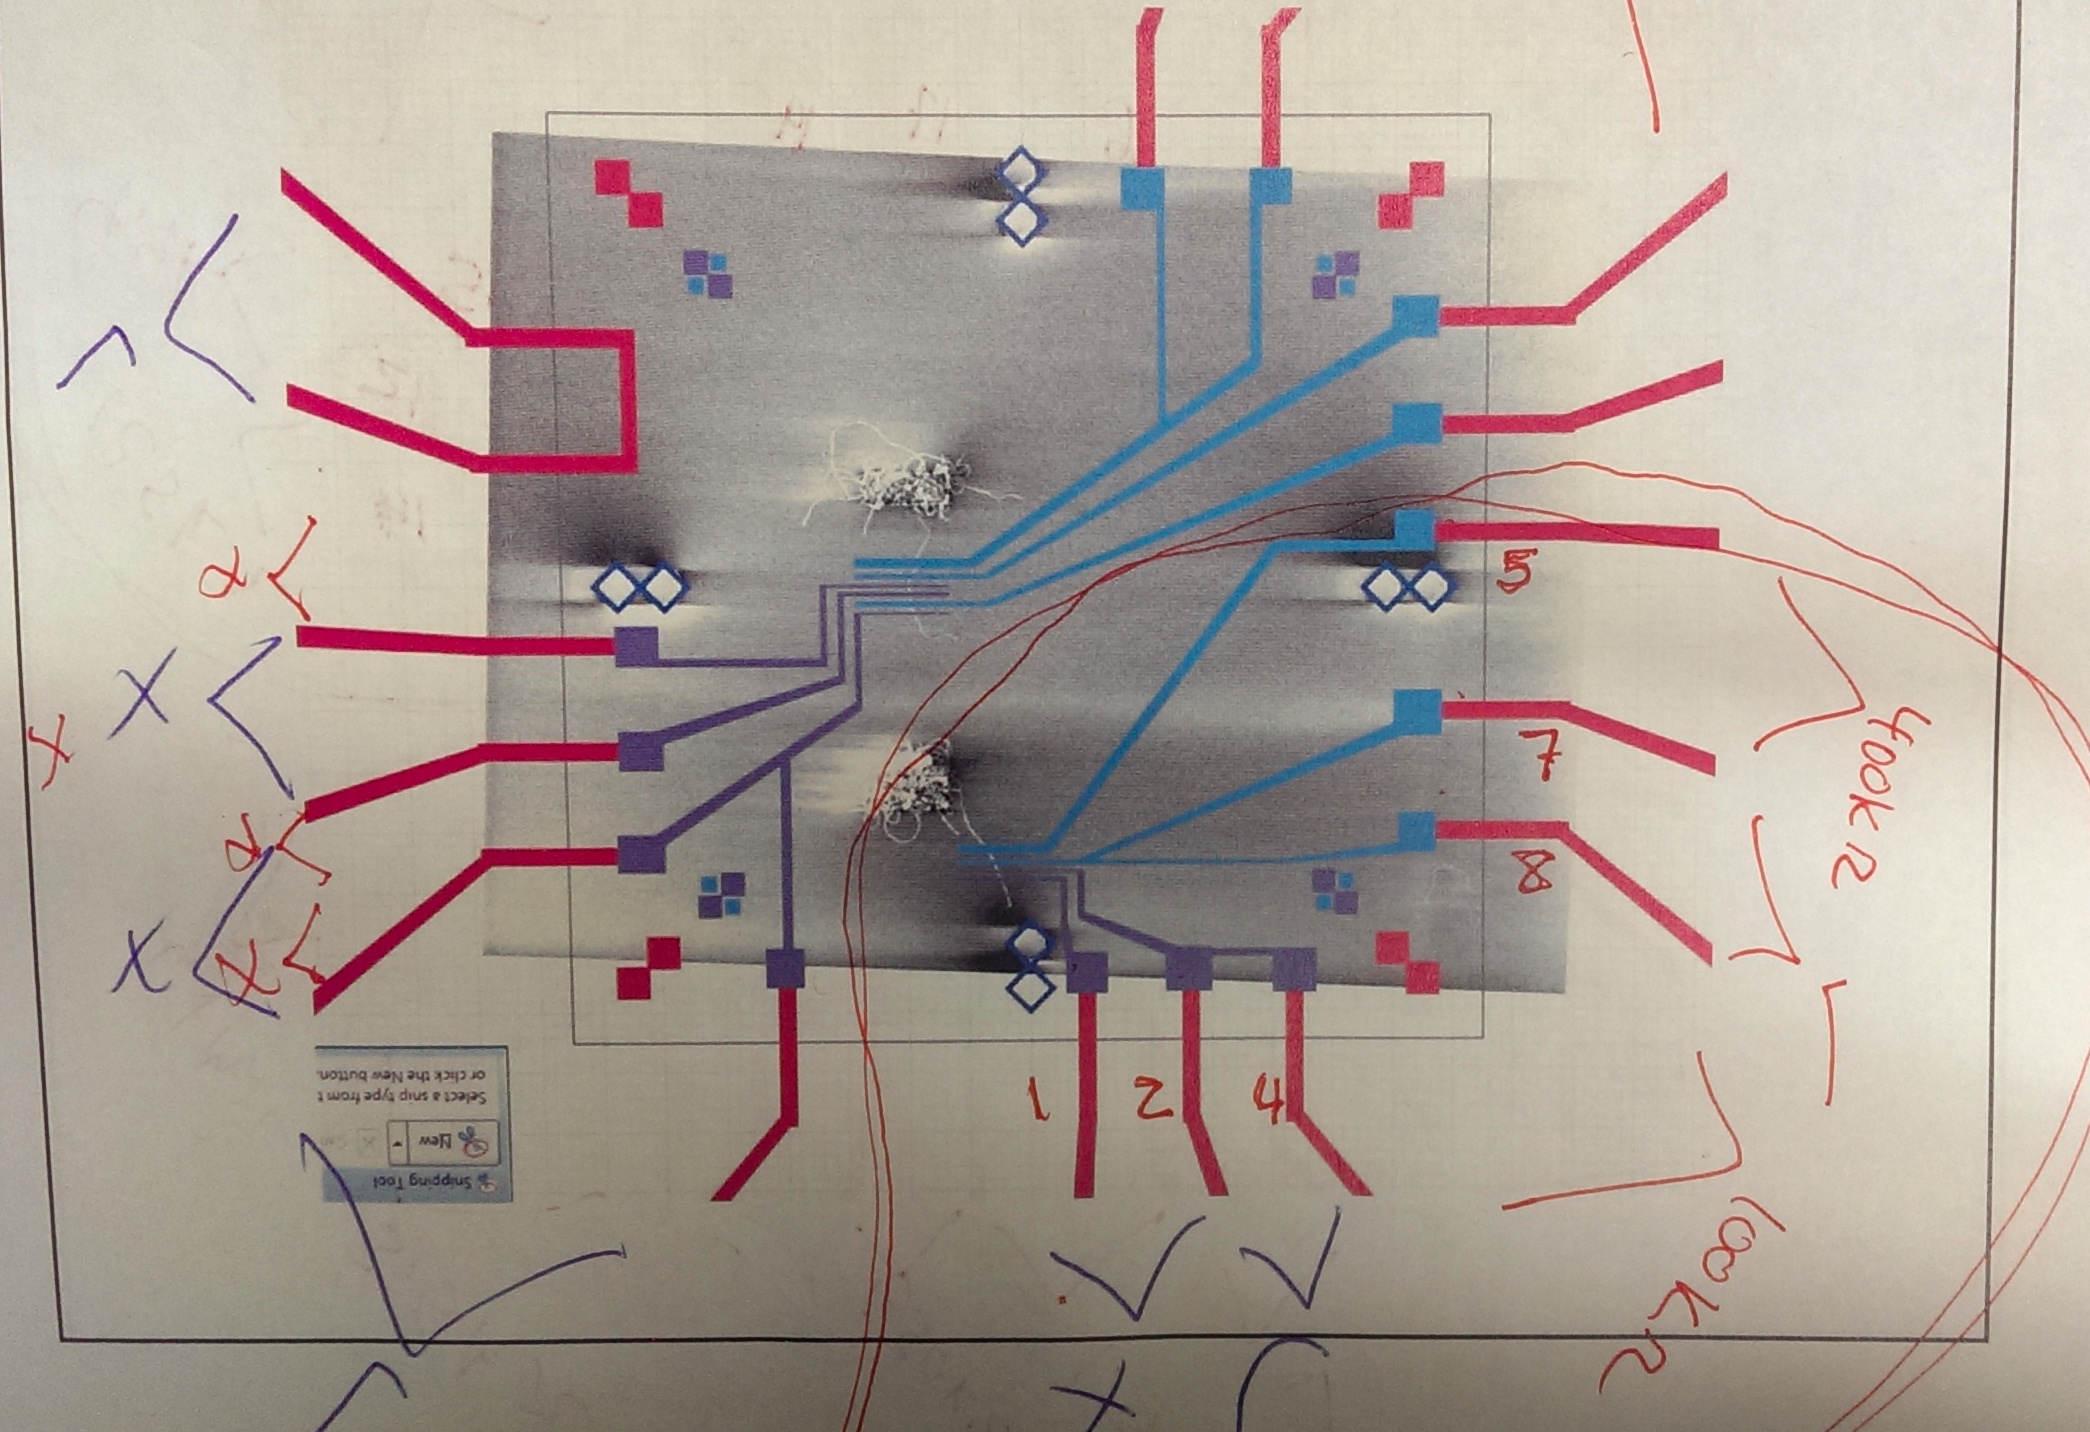

In [4]:
from IPython.display import display, Image

display(Image(figure_dir+'scfmh5_q1.jpg', width=500))
display(Image(figure_dir+'scfmh5_q3_2.jpg', width=500))

The blue leads are Nb, purple leads are Py. The red handwritten numbers are the same referenced in the seciton headings in this document. This thing is in the dunker/Reich lab magnet. The magnetic field points from right to left.

# 19-15 Py/Nb

Checking it at room temperature to make sure the gate is ok...

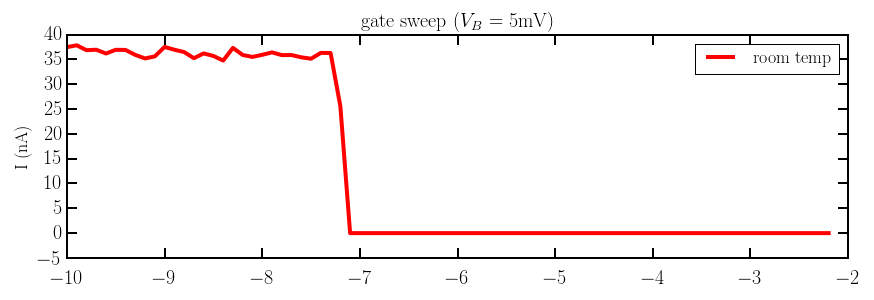

In [5]:
f = data_dir+'gateswp_19-15-6_300K-0T_a.bin'

gateswp = lvdt.get_data_2d(f)

fig = plt.figure(figsize=(14,4))

ax = fig.add_subplot(1,1,1)
ax.plot(gateswp['Gate'], gateswp['Iavg']*1e9, c = 'r', label = 'room temp')
#ax.set_xlim(0.5,3.5)
#ax.set_ylim(0,1.4)
ax.set_title('gate sweep ($V_B$ = 5mV)')
ax.set_ylabel('I (nA)')
ax.legend()

It actually died while I was checking the gate. What horrible luck.

# 14-12 Nb/Nb

In [6]:
f = data_dir+'gateswp_14-12-6_300K-0T_a.bin'

gateswp = lvdt.get_data_2d(f)

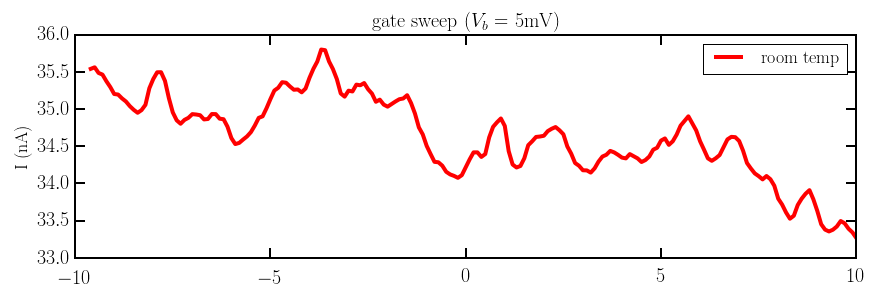

In [7]:
df = gateswp.groupby(gateswp['Gate']).mean()
df = pd.rolling_mean(df, 5)

fig = plt.figure(figsize=(14,4))

ax = fig.add_subplot(1,1,1)
ax.plot(df.index.astype(np.float), df['Iavg']*1e9, c = 'r', label = 'room temp')
#ax.set_xlim(0.5,3.5)
#ax.set_ylim(0,1.4)
ax.set_title('gate sweep ($V_b$ = 5mV)')
ax.set_ylabel('I (nA)')
ax.legend()

Cool. 

16/17/19 are all dead, so this nanotube has no working magnetic contacts. I'm not going to check the other tube until it is at 4K, based on my bad luck so far.

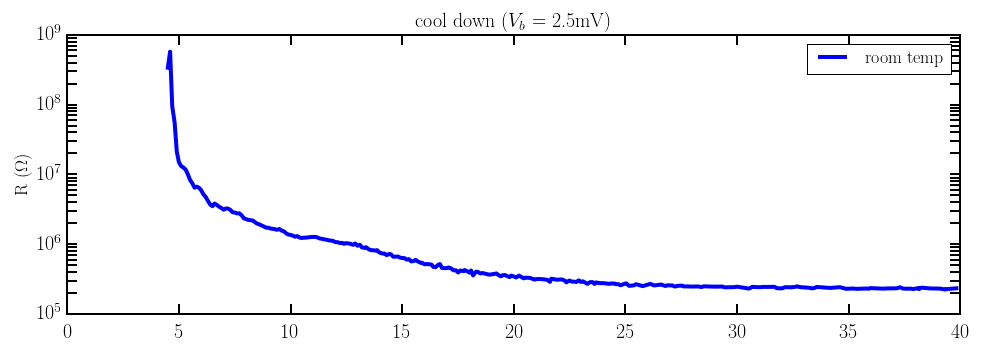

In [9]:
f = data_dir + 'cooldown_14-12-6_0T_a.bin'

df = lvdt.get_data_2d(f)
df = df[df['T'] < 40.0]

df = df.groupby(df['T'].apply(np.round, decimals=1)).mean()

df = df[df['Iavg'] > 0.0]
df.sort('T', inplace=True)

bias = 2.5e-3

fig = plt.figure(figsize=(16,5))

ax = fig.add_subplot(1,1,1)
ax.plot(df['T'], (bias/df['Iavg'])/1, 'b-', label='room temp')
#ax.set_xlim(5,10)
ax.set_yscale('log')
#ax.set_ylim(0.5e6,0.5e8)
ax.set_title('cool down ($V_b$ = 2.5mV)')
ax.set_ylabel('R $(\Omega)$')
ax.legend()

My best guess is that the leads went superconducting at about 6.5K. I only expect about a 0.5pA change in the measured current, so it's tough to say.

In [16]:
f = data_dir+'gateswp_14-12-6_4K-0T_b.bin'

gateswp = lvdt.get_data_2d(f) #there are 5 'symmetric about start' sweeps in here

In [18]:
# assign numbers for different sweeps and up/down sweeps
df = gateswp.iloc[:,1:5]
df['dir'] = np.array(['up' for i in range(len(df['Gate']))])
df['sweep'] = np.zeros(len(df['Gate']), dtype='int')

for i in range(len(ind)-1):
    if i%3 == 0:
        scan = i/3
        d = 'up'
        l = '{0:d} - {1}'.format(scan, d)
    elif i%3 ==1:
        scan = (i-1)/3
        d = 'down'
        l = '{0:d} - {1}'.format(scan, d)
    else:        
        scan = (i-2)/3
        d = 'up'
        l = '{0:d} - {1}'.format(scan, d)
    df['dir'][ind[i]:ind[i+1]] = np.array([d for j in range(ind[i+1]-ind[i])])
    df['sweep'][ind[i]:ind[i+1]] += scan
    
# average over sweeps 1-4 for up/down directions
gateup = df[(df['dir'] == 'up') & (df['sweep'] != 0)].groupby(df['Gate']).mean()
gatedown = df[(df['dir'] == 'down') & (df['sweep'] != 0)].groupby(df['Gate']).mean()

# plot
fig = plt.figure(figsize=(16,5))

ax = fig.add_subplot(1,1,1)
ax.plot(gateup['Gate'], gateup['Iavg']*1e9, c = 'b', label = 'up')
ax.plot(gatedown['Gate'], gatedown['Iavg']*1e9, c = 'g', label = 'down')
#ax.set_xlim(0.5,3.5)
#ax.set_ylim(0,1.4)
ax.set_title('gate sweep ($V_b$ = 0.5mV)')
ax.set_ylabel('I (nA)')
ax.legend(loc = 'lower left')

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


NameError: name 'ind' is not defined

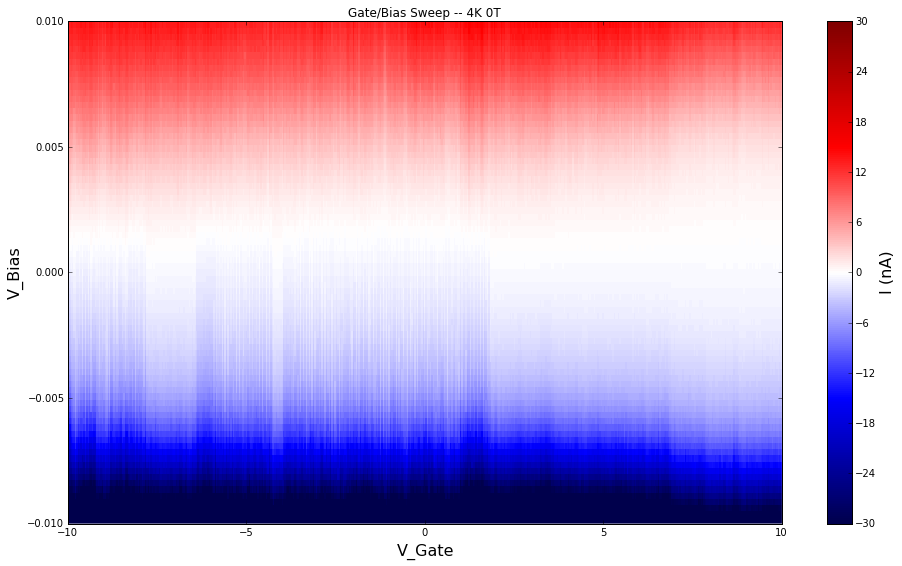

In [455]:
f = data_dir+'vigate_14-12-6_4K_0T_a.bin'

vigate = lvdt.get_data_3d(f)

vigate = vigate.groupby(vigate.index).mean()

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(vigate)
im = ax.imshow(vigate*1e9, extent = limits, 
           cmap = plt.cm.seismic, vmin = -30, vmax = 30, 
           origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_title('Gate/Bias Sweep -- 4K 0T')
ax.set_xlabel('V_Gate', fontsize=16)
ax.set_ylabel('V_Bias', fontsize=16)
cb = plt.colorbar(im)
cb.set_label('I (nA)', fontsize=16)

Well that didn't do much.

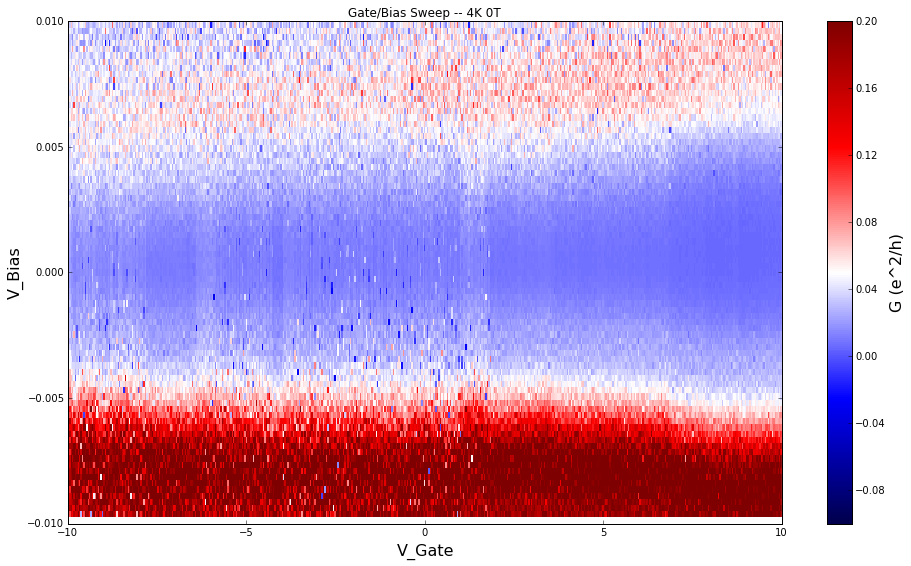

In [474]:
dv = 250e-6
dvdigate = (vigate.diff()/dv)/3.875e-5

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(dvdigate)
im = ax.imshow(dvdigate, extent = limits, 
           cmap = plt.cm.seismic, vmin = -0.1, vmax = 0.2, 
           origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_title('Gate/Bias Sweep -- 4K 0T')
ax.set_xlabel('V_Gate', fontsize=16)
ax.set_ylabel('V_Bias', fontsize=16)
cb = plt.colorbar(im)
cb.set_label('G (e^2/h)', fontsize=16)

Going to check the gate one more time at a higher bias. I suspect it is not working correctly, though. There doesn't seem to be a gate leak, so there's a chance something is just hooked up wrong.

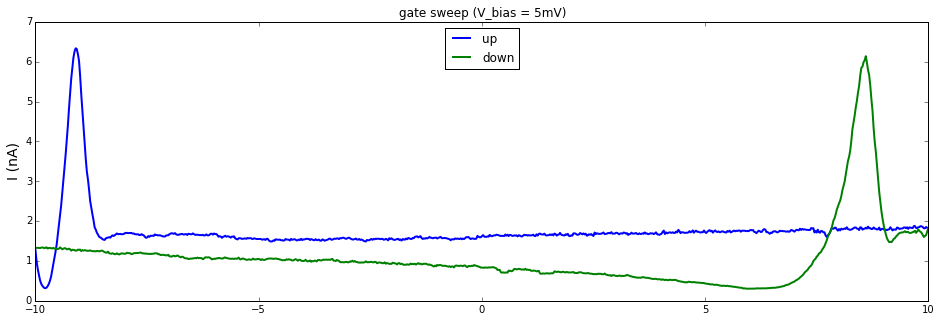

In [460]:
f = data_dir+'gateswp_14-12-6_4K-0T_c.bin'

gateswp = lvdt.get_data_2d(f) #there are 5 'symmetric about start' sweeps in here

df = gateswp.iloc[:,1:5]
df['dir'] = np.array(['up' for i in range(len(df['Gate']))])
df['sweep'] = np.zeros(len(df['Gate']), dtype='int')

for i in range(len(ind)-1):
    if i%3 == 0:
        scan = i/3
        d = 'up'
        l = '{0:d} - {1}'.format(scan, d)
    elif i%3 ==1:
        scan = (i-1)/3
        d = 'down'
        l = '{0:d} - {1}'.format(scan, d)
    else:        
        scan = (i-2)/3
        d = 'up'
        l = '{0:d} - {1}'.format(scan, d)
    df['dir'][ind[i]:ind[i+1]] = np.array([d for j in range(ind[i+1]-ind[i])])
    df['sweep'][ind[i]:ind[i+1]] += scan
    
# average over sweeps 1-4 for up/down directions
gateup = df[(df['dir'] == 'up') & (df['sweep'] != 0)].groupby(df['Gate']).mean()
gatedown = df[(df['dir'] == 'down') & (df['sweep'] != 0)].groupby(df['Gate']).mean()

# plot
fig = plt.figure(figsize=(16,5))

ax = fig.add_subplot(1,1,1)
ax.plot(gateup['Gate'], gateup['Iavg']*1e9, c = 'b', lw = 2, label = 'up')
ax.plot(gatedown['Gate'], gatedown['Iavg']*1e9, c = 'g', lw = 2, label = 'down')
#ax.set_xlim(0.5,3.5)
#ax.set_ylim(0,1.4)
ax.set_title('gate sweep (V_bias = 5mV)')
ax.set_ylabel('I (nA)', fontsize=14)
ax.legend(loc = 'upper center')

Same story at higher bias. I'm moving on for now.

#  7-2 Nb/Py

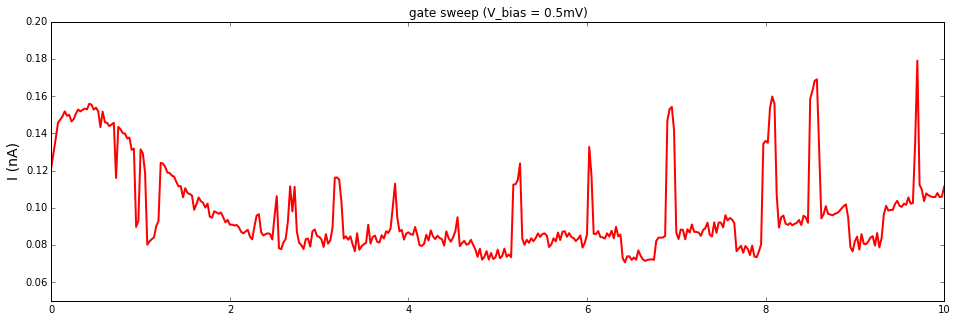

In [486]:
f = data_dir+'gateswp_7-2-6_0T_4K_a.bin'

gateswp = lvdt.get_data_2d(f)

fig = plt.figure(figsize=(16,5))

ax = fig.add_subplot(1,1,1)
ax.plot(gateswp['Gate'], gateswp['Iavg']*1e9, c = 'r', lw = 2)
#ax.set_xlim(0.5,3.5)
ax.set_ylim(0.05,0.2)
ax.set_title('gate sweep (V_bias = 0.5mV)')
ax.set_ylabel('I (nA)', fontsize=14)
#ax.legend()

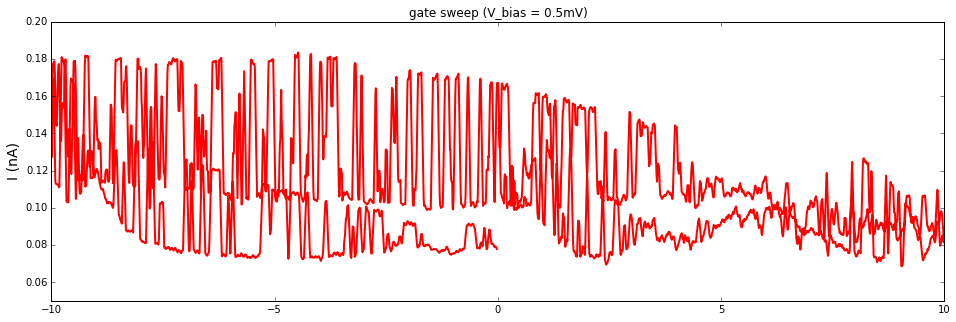

In [487]:
f = data_dir+'gateswp_7-2-6_0T_4K_b.bin'

gateswp = pd.rolling_mean(lvdt.get_data_2d(f), 5)

fig = plt.figure(figsize=(16,5))

ax = fig.add_subplot(1,1,1)
ax.plot(gateswp['Gate'], gateswp['Iavg']*1e9, c = 'r', lw = 2)
#ax.set_xlim(0.5,3.5)
ax.set_ylim(0.05,0.2)
ax.set_title('gate sweep (V_bias = 0.5mV)')
ax.set_ylabel('I (nA)', fontsize=14)
#ax.legend()

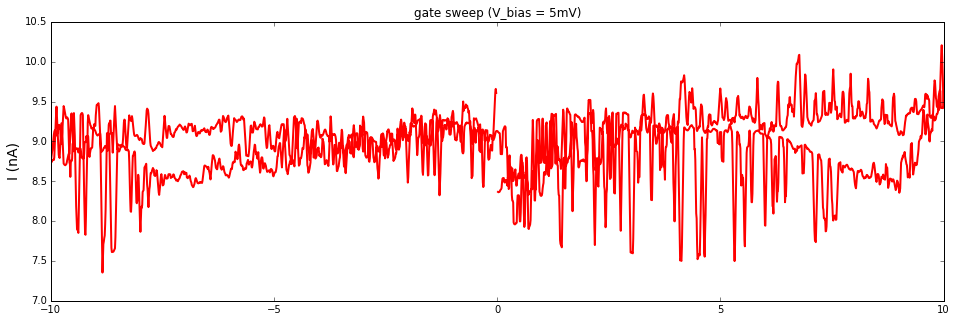

In [488]:
f = data_dir+'gateswp_7-2-6_0T_4K_c.bin'

gateswp = pd.rolling_mean(lvdt.get_data_2d(f), 5)

fig = plt.figure(figsize=(16,5))

ax = fig.add_subplot(1,1,1)
ax.plot(gateswp['Gate'], gateswp['Iavg']*1e9, c = 'r', lw = 2)
#ax.set_xlim(0.5,3.5)
#ax.set_ylim(0.05,0.2)
ax.set_title('gate sweep (V_bias = 5mV)')
ax.set_ylabel('I (nA)', fontsize=14)
#ax.legend()

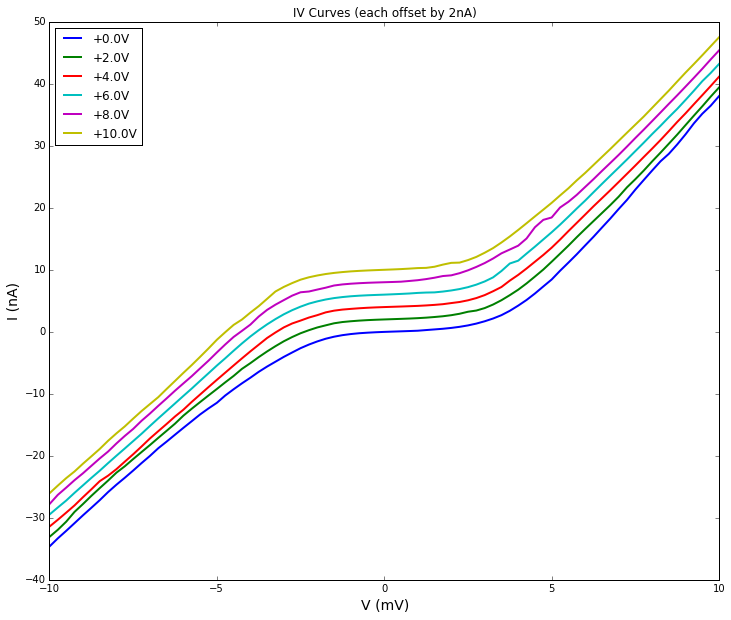

In [506]:
f = data_dir+'vigate_7-2-6_0T_4K_a.bin'

vigate = lvdt.get_data_3d(f)
vigate = vigate.groupby(vigate.index).mean()

labels = ['{:+0.1f}V'.format(g) for g in vigate.columns.values]

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(1,1,1)
for i in range(len(labels)):
    ax.plot(vigate.index*1e3, vigate.iloc[:,i]*1e9+i*2, lw = 2)
ax.set_xlim(-10,10)
#ax.set_ylim(0.05,0.2)
ax.set_title('IV Curves (each offset by 2nA)')
#ax.set_ylabel('I (nA)', fontsize=14)
ax.set_xlabel('V (mV)', fontsize=14)
ax.legend(labels, loc='upper left')

Took it out, tried to rewire the gate, blew it up.